# Statistical Analysis of CARM Test Launch #2

In [1]:
# importing necessary packages
# doing this first line bc using juypter notebook in vscode
import numpy as np
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.widgets import CheckButtons
import pandas as pd
import scipy.stats as s_stats
import seaborn as sns
import mplcursors

In [2]:
sns.set_theme(context='notebook', style='darkgrid', palette='colorblind', 
              font='sans-serif', font_scale=1, color_codes=True, rc=None) 
palette = sns.color_palette("colorblind")

In [3]:
raw_launch_data = pd.read_csv('data/test-flight2/DATALOG.CSV')
clipped_launch_data = pd.read_csv('data/test-flight2/clean_data.csv')
clipped_launch_data['time (ms)'] = clipped_launch_data['time (ms)'] - 1125703
print(clipped_launch_data['time (ms)'])
# print(clipped_launch_data['altitude (m)'])

0           0
1          49
2          99
3         145
4         194
        ...  
1709    87589
1710    87639
1711    87688
1712    87737
1713    87789
Name: time (ms), Length: 1714, dtype: int64


## Raw Data Plots

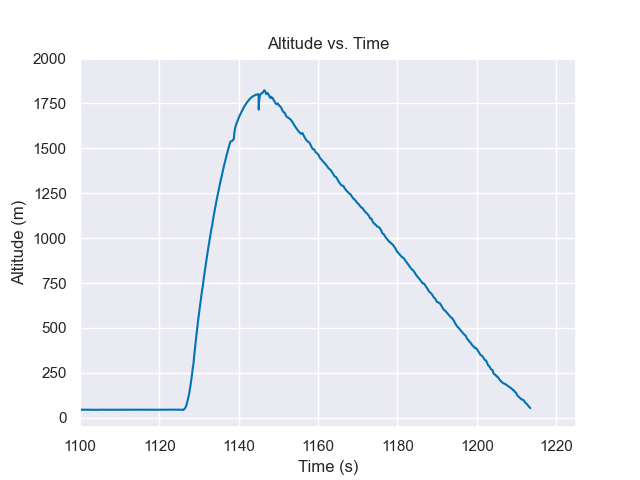

c:\Users\Daniel\miniconda3\envs\carm\lib\site-packages\mplcursors\_pick_info.py:142: UserWarning: Selection.target.index is deprecated and will be removed in the future; use Selection.index instead.
  warnings.warn(


In [4]:
fig, ax = plt.subplots()
altvtime = plt.plot(raw_launch_data['time (ms)'] / 1000, raw_launch_data['altitude (m)'])
plt.xlim([1100, 1225])
# by default the tooltip is displayed "onclick"
# we can change it by setting hover to True
cursor = mplcursors.cursor(altvtime, hover=True)
# by default the annotation displays the xy positions
# this is to change it to the countries name
@cursor.connect("add")
def on_add(sel):
    index = sel.target.index
    x = sel.target[0]
    y = sel.target[1]
    sel.annotation.set(text=f'Altitude: {y:.2f} m')
    
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.title('Altitude vs. Time')
plt.show()

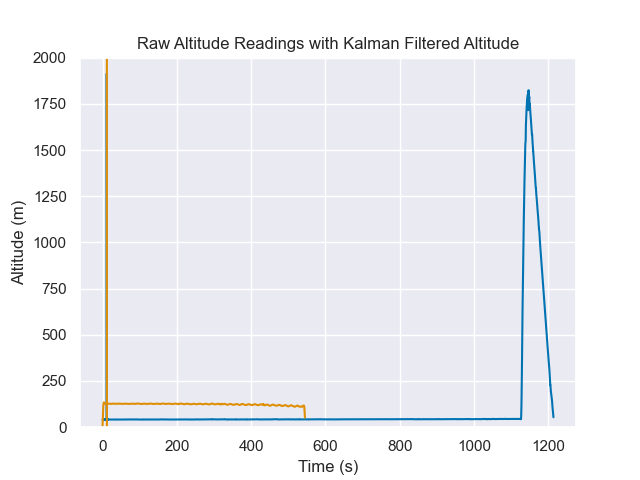

In [5]:
fig, ax = plt.subplots()
altvtime, = ax.plot(raw_launch_data['time (ms)'] / 1000, raw_launch_data['altitude (m)'], label="Raw Altitude")
kaltvtime, = ax.plot(raw_launch_data['time (ms)'] / 1000, raw_launch_data['kf altitude (m)'], label="Kalman Filtered Altitude")
# plt.xlim([1100, 1225])
plt.ylim([0, 2000])
# by default the tooltip is displayed "onclick"
# we can change it by setting hover to True
cursor = mplcursors.cursor([altvtime, kaltvtime], hover=True)

# by default the annotation displays the xy positions
# this is to change it to the countries name
@cursor.connect("add")
def on_add(sel):
    index = sel.target.index
    x = sel.target[0]
    y = sel.target[1]
    label = sel.artist.get_label()
    color = sel.artist.get_color()
    sel.annotation.set(text=f'{label}: {y}', bbox=dict(facecolor=color, alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))

plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.title('Raw Altitude Readings with Kalman Filtered Altitude')
plt.show()

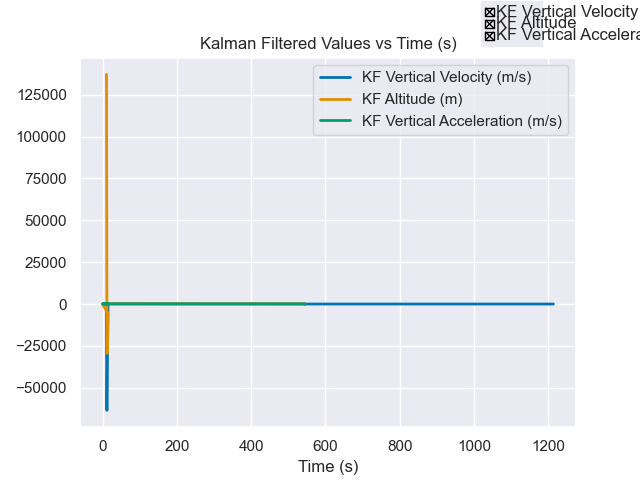

In [6]:
fig, ax = plt.subplots()
lines = []
lines.append(ax.plot(raw_launch_data['time (ms)'] / 1000, raw_launch_data['kf vertical velocity (m/s)'], visible=True, lw=2, label="KF Vertical Velocity (m/s)")[0])
lines.append(ax.plot(raw_launch_data['time (ms)'] / 1000, raw_launch_data['kf altitude (m)'], visible=True, lw=2, label="KF Altitude (m)")[0])
lines.append(ax.plot(raw_launch_data['time (ms)'] / 1000, raw_launch_data['kf vertical acceleration (m/s^2)'], visible=True, lw=2, label="KF Vertical Acceleration (m/s)")[0])

# Create check buttons to toggle lines
rax = plt.axes([0.75, 0.9, 0.1, 0.1]) 
labels = ['KF Vertical Velocity', 'KF Altitude', 'KF Vertical Acceleration']
visibility = [line.get_visible() for line in lines]
check = CheckButtons(rax, labels, visibility)

def toggle_lines(label):
    index = labels.index(label)
    lines[index].set_visible(not lines[index].get_visible())
    plt.draw()

check.on_clicked(toggle_lines)

ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('')
ax.set_title('Kalman Filtered Values vs Time (s)')
plt.show()

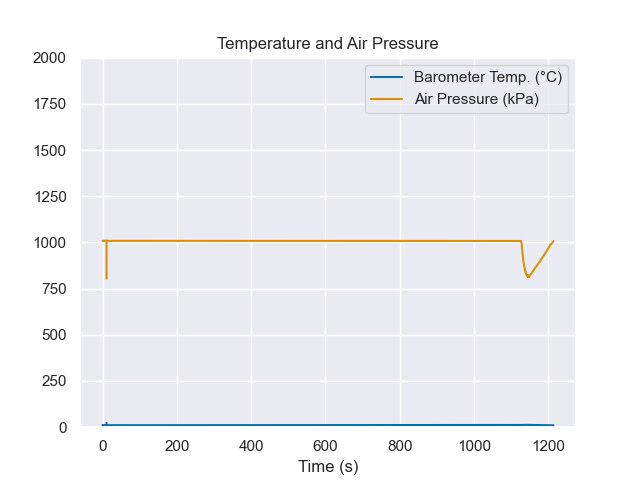

In [7]:
fig, ax = plt.subplots()
altvtime, = ax.plot(raw_launch_data['time (ms)'] / 1000, raw_launch_data['barometer temp (C)'], label="Barometer Temp. (°C)")
kaltvtime, = ax.plot(raw_launch_data['time (ms)'] / 1000, raw_launch_data['air pressure (kPa)'], label="Air Pressure (kPa)")
# plt.xlim([1100, 1225])
plt.ylim([0, 2000])
# by default the tooltip is displayed "onclick"
# we can change it by setting hover to True
cursor = mplcursors.cursor([altvtime, kaltvtime], hover=True)

# by default the annotation displays the xy positions
# this is to change it to the countries name
@cursor.connect("add")
def on_add(sel):
    index = sel.target.index
    x = sel.target[0]
    y = sel.target[1]
    label = sel.artist.get_label()
    color = sel.artist.get_color()
    sel.annotation.set(text=f'{label}: {y}', bbox=dict(facecolor=color, alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))

# Add legend
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('')
ax.set_title('Temperature and Air Pressure')
plt.show()

## Summary Statistics for CARM Test Launch 2

**Apogee**: ~1,823 m (5980.97 ft) @ 19.3 seconds
**Recovery Deployment**: 
 - Primary Drogue black powder charge - deployed at apogee
 - Backup Drogue CO<sub>2</sub> canister - deployed at apogee + 3.05 seconds

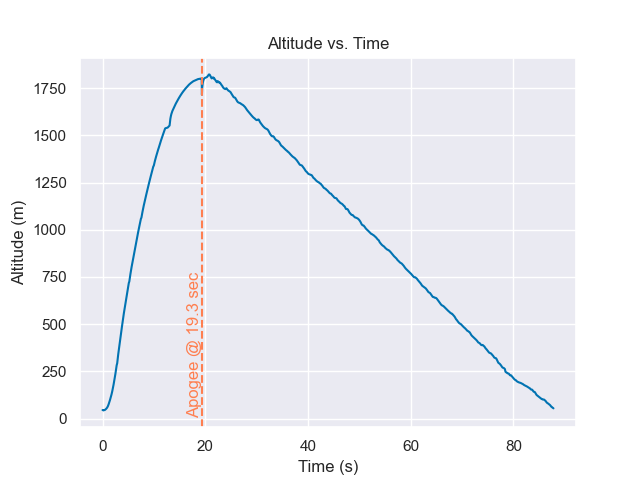

In [8]:
fig, ax = plt.subplots()
altvtime = plt.plot(clipped_launch_data['time (ms)']/1000, clipped_launch_data['altitude (m)'])

# by default the tooltip is displayed "onclick"
# we can change it by setting hover to True
cursor = mplcursors.cursor(altvtime, hover=True)
# by default the annotation displays the xy positions
# this is to change it to the countries name
@cursor.connect("add")
def on_add(sel):
    index = sel.target.index
    x = sel.target[0]
    y = sel.target[1]
    sel.annotation.set(text=f'Altitude: {y:.2f} m')

# plotting apogee line
apogee_time_s = 19300/1000
plt.axvline(x=apogee_time_s, color='coral', linestyle='--')  
plt.text(apogee_time_s, 0.5 + 5 / 100, 'Apogee @ 19.3 sec', color='coral', ha='right', va='bottom', rotation=90)

plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.title('Altitude vs. Time')
plt.show()

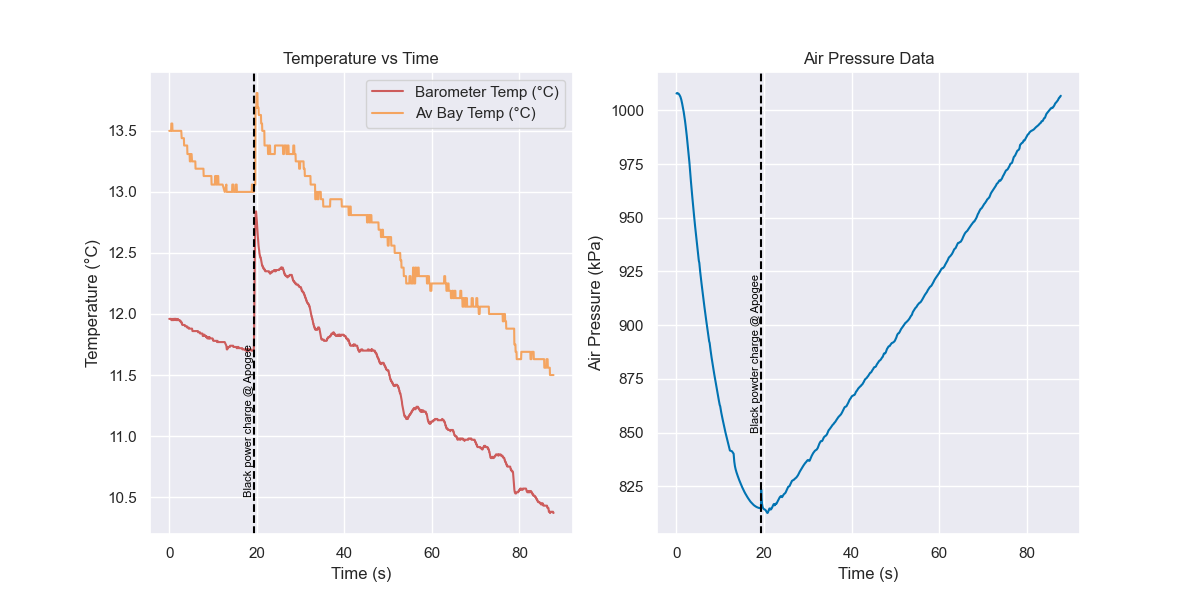

In [9]:
apogee_time_s = 19300/1000

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
btemp, = ax1.plot(clipped_launch_data['time (ms)']/1000, clipped_launch_data['barometer temp (C)'], label='Barometer Temp (°C)', color='indianred')
avtemp, = ax1.plot(clipped_launch_data['time (ms)']/1000, clipped_launch_data['av bay temperature (C)'], label='Av Bay Temp (°C)', color='sandybrown')
ax1.axvline(x=apogee_time_s, color='black', linestyle='--')  
ax1.text(apogee_time_s, 10.5, 'Black power charge @ Apogee', color='black', ha='right', va='bottom', rotation=90, fontsize=8)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Temperature (°C)')
ax1.set_title('Temperature vs Time')
ax1.legend()

apressure, = ax2.plot(clipped_launch_data['time (ms)']/1000, clipped_launch_data['air pressure (kPa)'], label='Air Pressure (kPa)')
ax2.axvline(x=apogee_time_s, color='black', linestyle='--')  
ax2.text(apogee_time_s, 850, 'Black powder charge @ Apogee', color='black', ha='right', va='bottom', rotation=90, fontsize=8)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Air Pressure (kPa)')
ax2.set_title('Air Pressure Data')



cursor = mplcursors.cursor([apressure, btemp, avtemp], hover=True)

@cursor.connect("add")
def on_add(sel):
    index = sel.target.index
    x = sel.target[0]
    y = sel.target[1]
    label = sel.artist.get_label()
    color = sel.artist.get_color()
    sel.annotation.set(text=f'{label}: {y}', bbox=dict(facecolor=color, alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

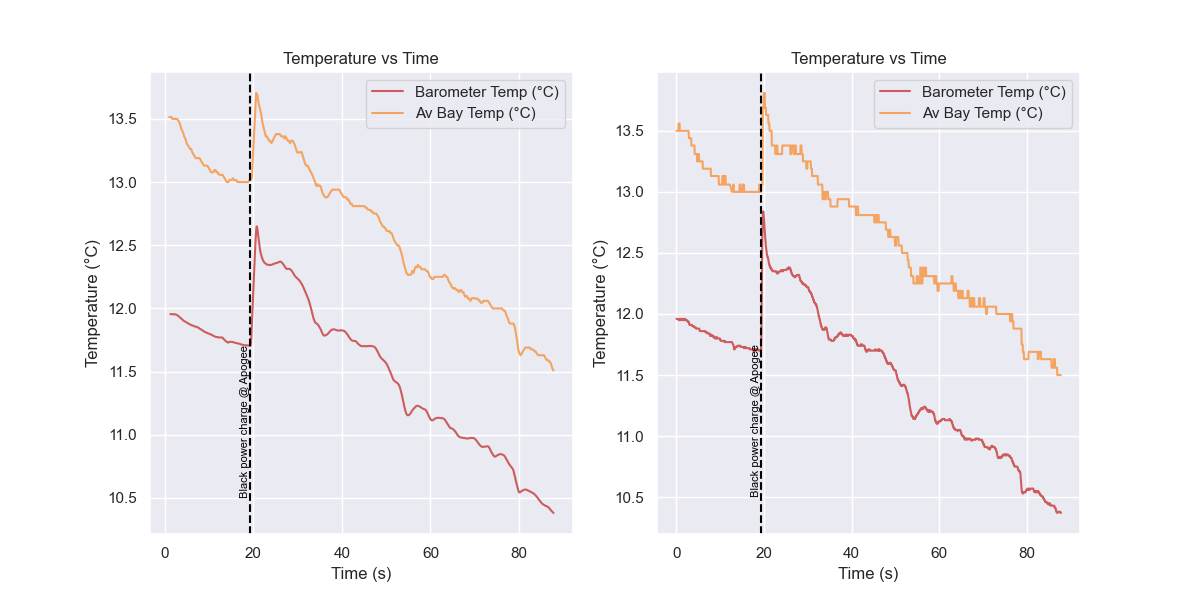

In [10]:
apogee_time_s = 19300/1000

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# used this to figure out how to plot simple moving average
sma_btemp, = ax1.plot(clipped_launch_data['time (ms)']/1000, clipped_launch_data['barometer temp (C)'].rolling(window=25).mean(), label='Barometer Temp (°C)', color='indianred')
sma_avtemp, = ax1.plot(clipped_launch_data['time (ms)']/1000, clipped_launch_data['av bay temperature (C)'].rolling(window=20).mean(), label='Av Bay Temp (°C)', color='sandybrown')
ax1.axvline(x=apogee_time_s, color='black', linestyle='--')  
ax1.text(apogee_time_s, 10.5, 'Black power charge @ Apogee', color='black', ha='right', va='bottom', rotation=90, fontsize=8)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Temperature (°C)')
ax1.set_title('Temperature vs Time')
ax1.legend()

btemp, = ax2.plot(clipped_launch_data['time (ms)']/1000, clipped_launch_data['barometer temp (C)'], label='Barometer Temp (°C)', color='indianred')
avtemp, = ax2.plot(clipped_launch_data['time (ms)']/1000, clipped_launch_data['av bay temperature (C)'], label='Av Bay Temp (°C)', color='sandybrown')
ax2.axvline(x=apogee_time_s, color='black', linestyle='--')  
ax2.text(apogee_time_s, 10.5, 'Black power charge @ Apogee', color='black', ha='right', va='bottom', rotation=90, fontsize=8)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Temperature (°C)')
ax2.set_title('Temperature vs Time')
ax2.legend()



cursor = mplcursors.cursor([sma_btemp, sma_avtemp, btemp, avtemp], hover=True)

@cursor.connect("add")
def on_add(sel):
    index = sel.target.index
    x = sel.target[0]
    y = sel.target[1]
    label = sel.artist.get_label()
    color = sel.artist.get_color()
    sel.annotation.set(text=f'{label}: {y}', bbox=dict(facecolor=color, alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

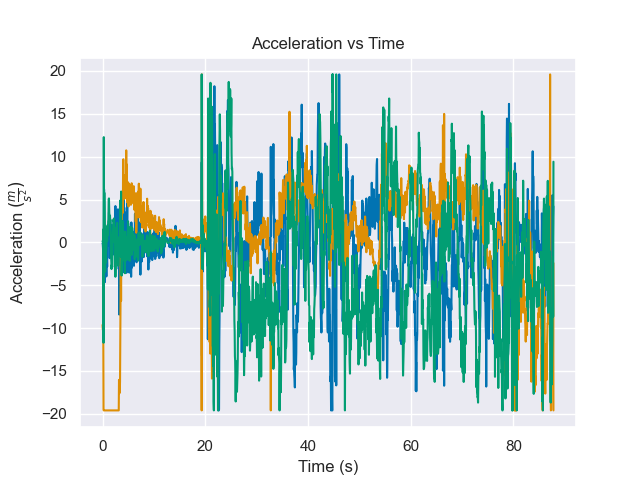

In [11]:
apogee_time_s = 19300/1000

fig, ax = plt.subplots()
x_accel, = ax.plot(clipped_launch_data['time (ms)']/1000, clipped_launch_data['x acceleration (m/s^2)'])
y_accel, = ax.plot(clipped_launch_data['time (ms)']/1000, clipped_launch_data['y acceleration (m/s^2)'])
z_accel, = ax.plot(clipped_launch_data['time (ms)']/1000, clipped_launch_data['z acceleration (m/s^2)'])
# ax.axvline(x=apogee_time_s, color='black', linestyle='--')  
# ax.text(apogee_time_s, 10.5, 'Black power charge @ Apogee', color='black', ha='right', va='bottom', rotation=90, fontsize=8)
ax.set_xlabel('Time (s)')
ax.set_ylabel(r'Acceleration $(\frac{m}{s^2})$')
ax.set_title('Acceleration vs Time')


cursor = mplcursors.cursor([x_accel, y_accel, z_accel], hover=True)

@cursor.connect("add")
def on_add(sel):
    index = sel.target.index
    x = sel.target[0]
    y = sel.target[1]
    label = sel.artist.get_label()
    color = sel.artist.get_color()
    sel.annotation.set(text=f'{label}: {y}', bbox=dict(facecolor=color, alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

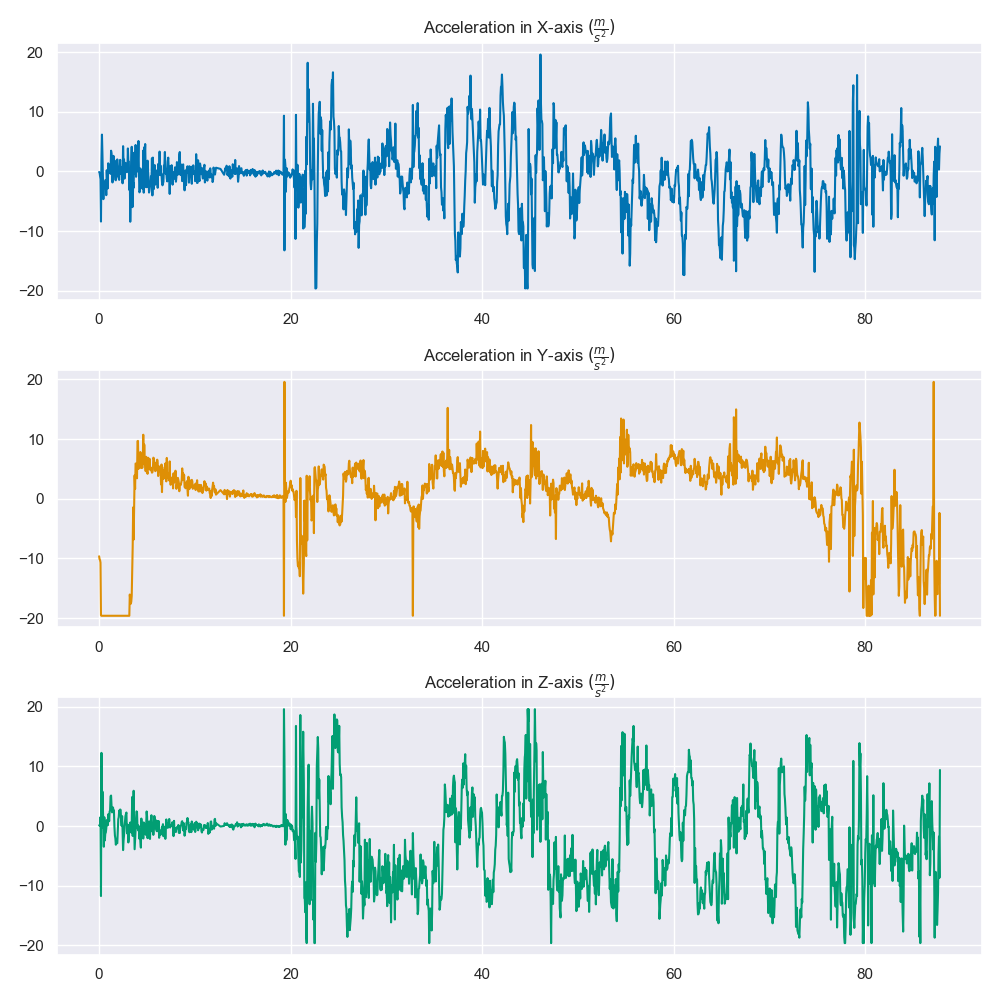

In [12]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Plot data on each subplot
axs[0].plot(clipped_launch_data['time (ms)']/1000, clipped_launch_data['x acceleration (m/s^2)'], label="Acceleration X")
axs[0].set_title(r'Acceleration in X-axis $(\frac{m}{s^2})$')
axs[1].plot(clipped_launch_data['time (ms)']/1000, clipped_launch_data['y acceleration (m/s^2)'], label="Acceleration Y", color=palette[1])
axs[1].set_title(r'Acceleration in Y-axis $(\frac{m}{s^2})$')
axs[2].plot(clipped_launch_data['time (ms)']/1000, clipped_launch_data['z acceleration (m/s^2)'], label="Acceleration Z", color=palette[2])
axs[2].set_title(r'Acceleration in Z-axis $(\frac{m}{s^2})$')

# Create a cursor for all subplots
cursor = mplcursors.cursor([axs[0], axs[1], axs[2]], hover=True)

# Add annotations for all subplots at the same x-coordinate
@cursor.connect("add")
def on_add(sel):
    x = sel.target[0]
    idx = np.nonzero(x == x)[0][0]
    y1_val = clipped_launch_data['x acceleration (m/s^2)'][idx]
    y2_val = clipped_launch_data['y acceleration (m/s^2)'][idx]
    y3_val = clipped_launch_data['z acceleration (m/s^2)'][idx]
    sel.annotation.set(text=f'Time: {x:.2f} s\nX Accel: {y1_val:.2f}\nY Accel: {y2_val:.2f}\nZ Accel: {y3_val:.2f}', 
                        bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()


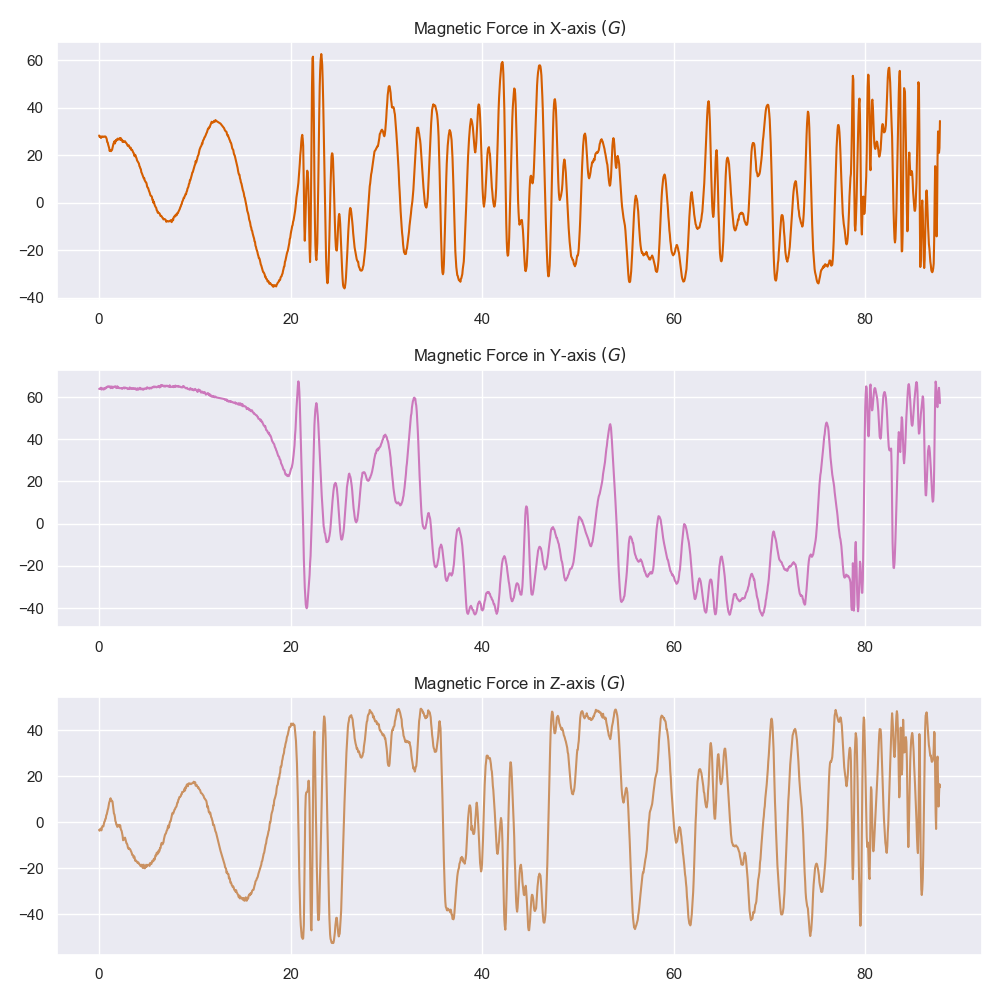

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Plot data on each subplot
axs[0].plot(clipped_launch_data['time (ms)']/1000, clipped_launch_data['x magnetic force (gauss)'], label="Magnetic Force X", color=palette[3])
axs[0].set_title(r'Magnetic Force in X-axis $(G)$')
axs[1].plot(clipped_launch_data['time (ms)']/1000, clipped_launch_data['y magnetic force (gauss)'], label="Magnetic Force Y", color=palette[4])
axs[1].set_title(r'Magnetic Force in Y-axis $(G)$')
axs[2].plot(clipped_launch_data['time (ms)']/1000, clipped_launch_data['z magnetic force (gauss)'], label="Magnetic Force Z", color=palette[5])
axs[2].set_title(r'Magnetic Force in Z-axis $(G)$')

# Create a cursor for all subplots
cursor = mplcursors.cursor([axs[0], axs[1], axs[2]], hover=True)

# Add annotations for all subplots at the same x-coordinate
@cursor.connect("add")
def on_add(sel):
    x = sel.target[0]
    idx = np.nonzero(x == x)[0][0]
    y1_val = clipped_launch_data['x magnetic force (gauss)'][idx]
    y2_val = clipped_launch_data['y magnetic force (gauss)'][idx]
    y3_val = clipped_launch_data['z magnetic force (gauss)'][idx]
    sel.annotation.set(text=f'Time: {x:.2f} s\nX Mag Force: {y1_val:.2f}\nY Mag Force: {y2_val:.2f}\nZ Mag Force: {y3_val:.2f}', 
                        bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()


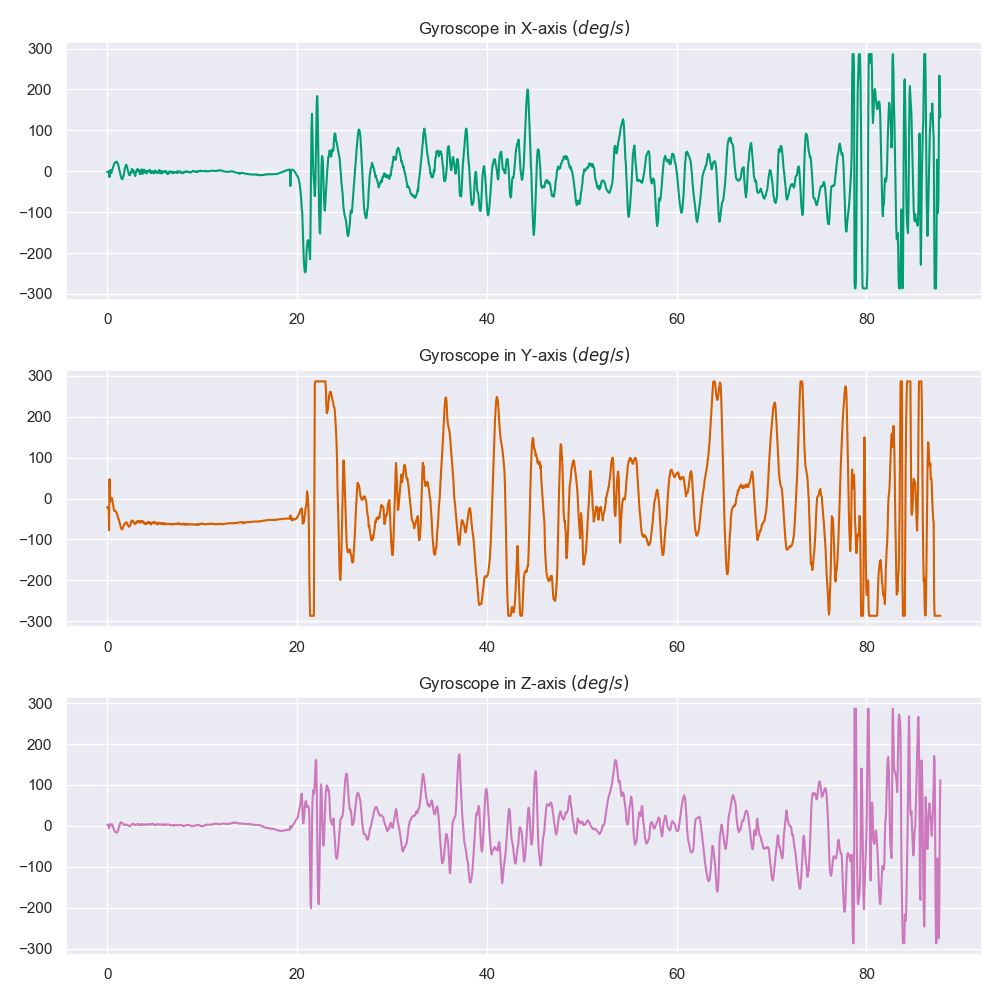

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Plot data on each subplot
axs[0].plot(clipped_launch_data['time (ms)']/1000, np.degrees(clipped_launch_data['x gyro (dps)']), label="Gyro X", color=palette[2])
axs[0].set_title(r'Gyroscope in X-axis $(deg/s)$')
axs[1].plot(clipped_launch_data['time (ms)']/1000, np.degrees(clipped_launch_data['y gyro (dps)']), label="Gyro Y", color=palette[3])
axs[1].set_title(r'Gyroscope in Y-axis $(deg/s)$')
axs[2].plot(clipped_launch_data['time (ms)']/1000, np.degrees(clipped_launch_data['z gyro (dps)']), label="Gyro Z", color=palette[4])
axs[2].set_title(r'Gyroscope in Z-axis $(deg/s)$')

# Create a cursor for all subplots
cursor = mplcursors.cursor([axs[0], axs[1], axs[2]], hover=True)

# Add annotations for all subplots at the same x-coordinate
@cursor.connect("add")
def on_add(sel):
    x = sel.target[0]
    idx = np.nonzero(x == x)[0][0]
    y1_val = clipped_launch_data['x gyro (dps)'][idx]
    y2_val = clipped_launch_data['y gyro (dps)'][idx]
    y3_val = clipped_launch_data['z gyro (dps)'][idx]
    sel.annotation.set(text=f'Time: {x:.2f} s\nX Gyro: {y1_val:.2f}\nY Gyro: {y2_val:.2f}\nZ Gyro: {y3_val:.2f}', 
                        bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()